# 导入库

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import qgrid
import seaborn as sns

# 导入数据

In [64]:
# Import Data
df_raw = pd.read_excel("../../plot/weekly3.xlsx")
df_raw1=df_raw[['苯1','甲苯1','乙苯1']]
df_raw1.rename(columns = {"苯1": "ben1", "甲苯1":"tb1",'乙苯1':'eb1'},  inplace=True)
df_raw1=df_raw1[2:][:10]
df_raw1

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ben1,tb1,eb1
2,0.246667,0.012083,0.020870
3,0.255000,0.013478,0.067083
4,0.303750,0.017619,0.075417
5,0.398750,0.028750,0.144583
6,0.444000,0.030000,0.148333
7,0.446957,0.034348,0.190435
8,0.447083,0.087917,0.237917
9,0.475000,0.261667,0.283913
10,0.490000,0.308333,0.326250
11,0.497500,0.326667,0.394167


In [80]:
df = df_raw1[['ben1',
             'eb1']].groupby('eb1').apply(lambda x: x.mean())
df.sort_values('ben1', inplace=True)
df
# df.reset_index(inplace=True)   用来重置dataframe

,ben1,eb1
eb1,,
0.020870,0.246667,0.020870
0.067083,0.255000,0.067083
0.075417,0.303750,0.075417
0.144583,0.398750,0.144583
0.148333,0.444000,0.148333
0.190435,0.446957,0.190435
0.237917,0.447083,0.237917
0.283913,0.475000,0.283913
0.326250,0.490000,0.326250


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32463 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32428 missing from curre

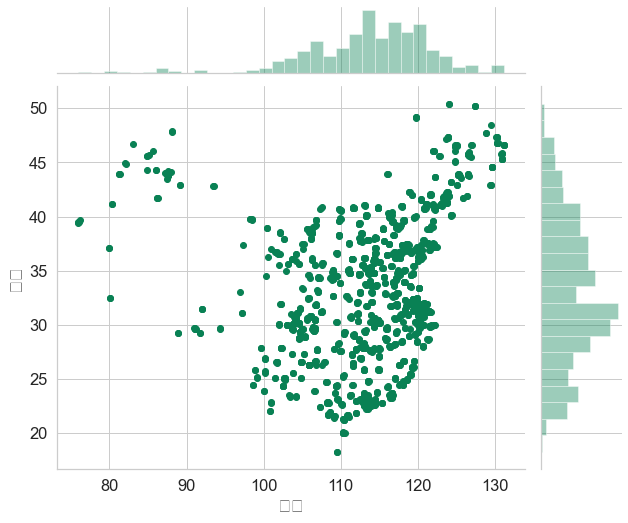

In [23]:
sns.set(style="whitegrid", font_scale=1.5)  #设置主题，文本大小
g = sns.jointplot(
    x='经度',
    y='纬度',
    data=df,  #输入两个绘图变量
    color='#098154',  #修改颜色
)
g.fig.set_size_inches(10, 8)

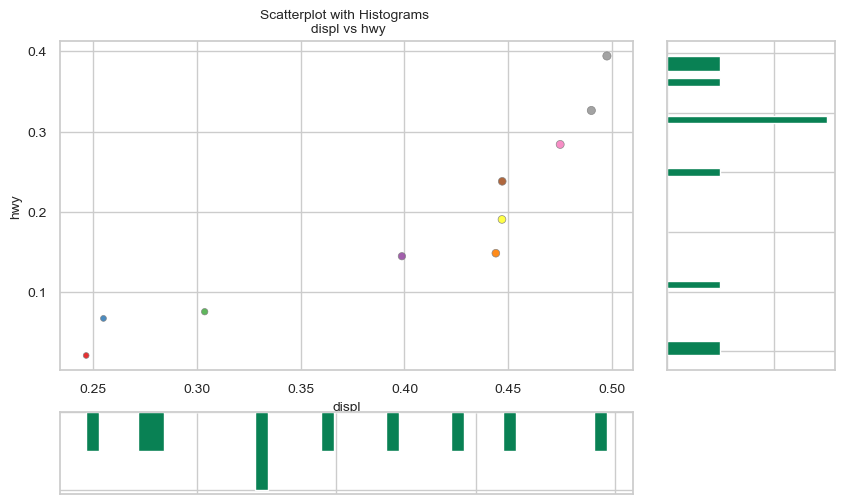

In [89]:
fig = plt.figure(figsize=(10, 6), dpi=100)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('ben1',
                'eb1',
                s=df.ben1 * 70,
                c=df.eb1.astype('category').cat.codes,
                alpha=.9,
                data=df,
                cmap="Set1",
                edgecolors='gray',
                linewidths=.5)

ax_bottom.hist(df.eb1,
               40,
               histtype='stepfilled',
               orientation='vertical',
               color='#098154')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.ben1,
              40,
              histtype='stepfilled',
              orientation='horizontal',
              color='#098154')
##设置坐标轴
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy',
            xlabel='displ',
            ylabel='hwy')
ax_main.title.set_fontsize(10)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] +
             ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(10)

# xlabels = ax_main.get_xticks().tolist()
# ax_main.set_xticklabels(xlabels)
plt.show()